In [236]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load Data

In [176]:
def load_data(path):
    
    data = pd.read_csv(path, delim_whitespace = True, header = None )
    
    columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
         'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
         'other_debtors', 'residing_since', 'property', 'age',
         'inst_plans', 'housing', 'num_credits',
         'job', 'dependents', 'telephone', 'foreign_worker', 'status']
                  
    
    data.columns = columns

    return data

In [177]:
path = './german.txt'

In [215]:
df = load_data(path)
df.loc[df.status == 2, 'status'] = 0

# About Data

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
purpose              1000 non-null object
amount               1000 non-null int64
saving_acc           1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
other_debtors        1000 non-null object
residing_since       1000 non-null int64
property             1000 non-null object
age                  1000 non-null int64
inst_plans           1000 non-null object
housing              1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
dependents           1000 non-null int64
telephone            1000 non-null object
foreign_worker       1000 non-null object
status               1000 non-null int64
dtypes: int64(8), ob

In [180]:
df.status.value_counts()

1    700
0    300
Name: status, dtype: int64

In [181]:
df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


# EDA before splitting

In [182]:
def distribution_plot_numerical(X, num_cols):

    plt.figure(figsize=(20,15))
    for i in range(0, len(num_cols)):

        plt.subplot(4,2,i+1)
        sns.distplot(X[num_cols[i]], kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

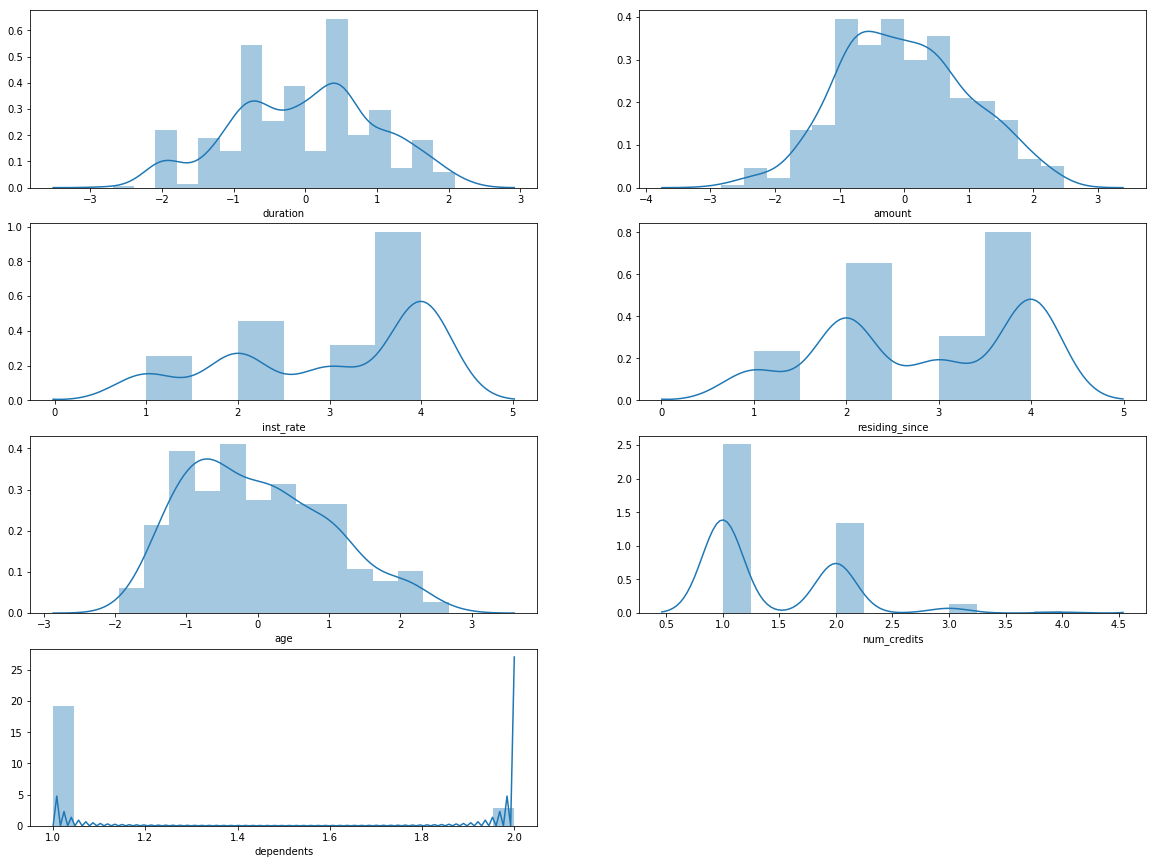

In [166]:
distribution_plot_numerical(X_train, num_cols)

In [140]:
def distribution_plot_categorical(X, cat_cols):
    plt.figure(figsize=(20,15))
    for i in range(0, len(cat_cols)):

        plt.subplot(7,2,i+1)
        sns.countplot(df[cat_cols[i]])
        plt.tight_layout()

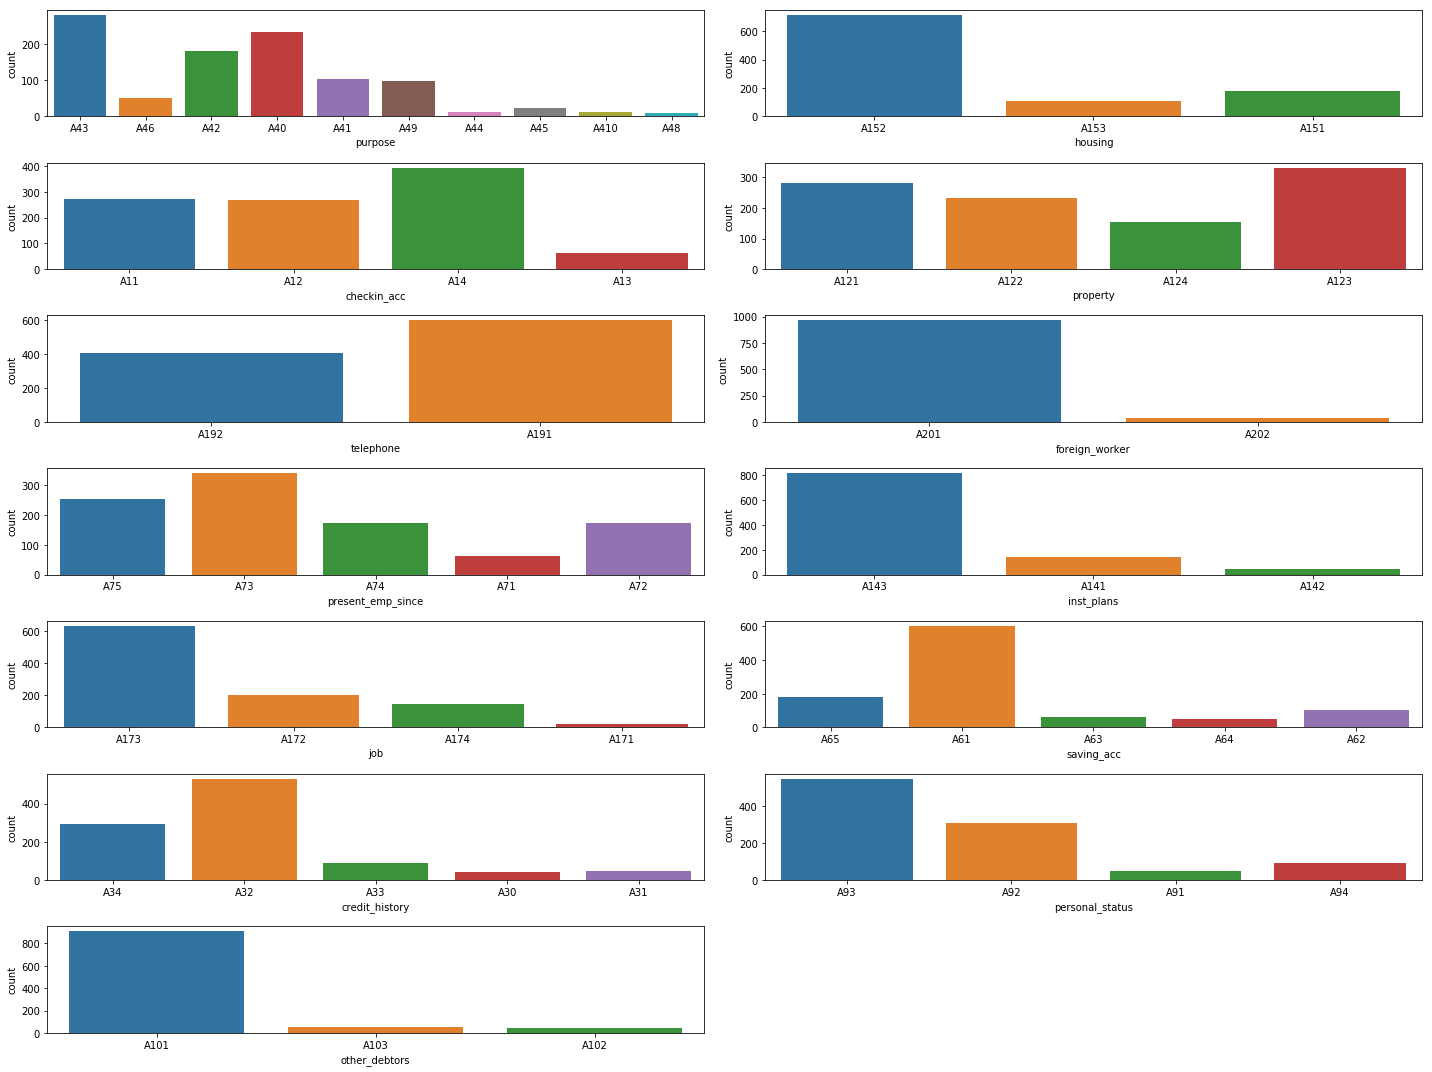

In [141]:
distribution_plot_categorical(X_train, cat_cols)

# Splitting Data  (Train - Validation - Test )

In [216]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5 , random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y,test_size=0.5 , random_state=42)

In [218]:
X_train.shape,X_val.shape,X_test.shape

((500, 20), (500, 20), (500, 20))

In [219]:
num_cols = X_train._get_numeric_data().columns.values
cat_cols = list(set(X_train.columns) - set(num_cols))

# EDA - Univariate

## 1) Q - Q plot

In [83]:
def qq_calculate(X_train, X_test):
     
    train = []
    test = []
    for quantile in np.arange(0.1,1.1,0.1):
        train.append(X_train.quantile(quantile))
        test.append(X_test.quantile(quantile))   
    train_quantile = pd.concat(train, axis=1)
    test_quantile = pd.concat(test, axis=1)
    train_quantile.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
    test_quantile.columns = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
    return train_quantile, test_quantile

In [84]:
def qq_plot(train_quantile, test_quantile):
    
    features = train_quantile.index.values
    plt.figure(figsize=(13,15))
    for i in range(0, len(features)):
        plt.subplot(5,2,i+1)
        plt.plot(train_quantile.loc[features[i]], test_quantile.loc[features[i]])
        plt.plot(train_quantile.loc[features[i]], train_quantile.loc[features[i]])
        plt.xlabel('Train_' + features[i])
        plt.ylabel('Test_' + features[i])
        plt.tight_layout()

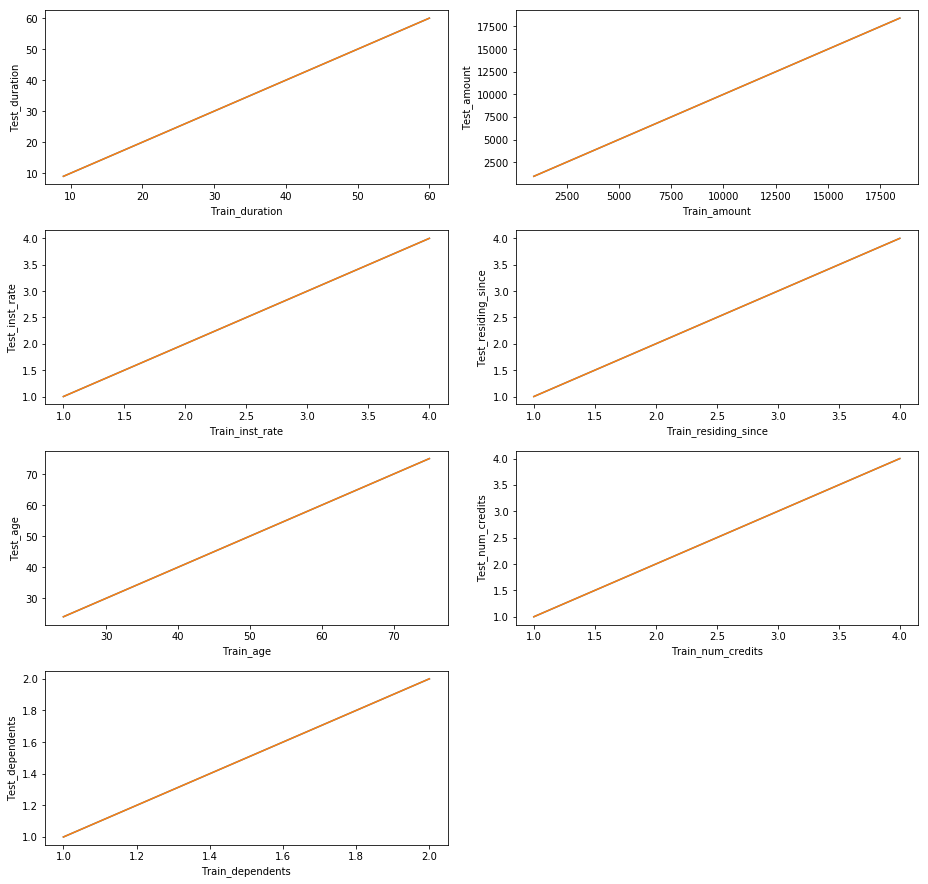

In [85]:
train_quantile, test_quantile = qq_calculate(X_train, X_val)
qq_plot(train_quantile, test_quantile)

- The above q-q plot shows that the train-test data have a similar distribution

## 2) Box- whisker plot

In [82]:
def box_plot(X, num_cols):
    plt.figure(figsize=(13,15))
    for i in range(0, len(num_cols)):

            plt.subplot(4,2,i+1)
            sns.boxplot(y=num_cols[i],data = X)

    plt.tight_layout()
    plt.show()

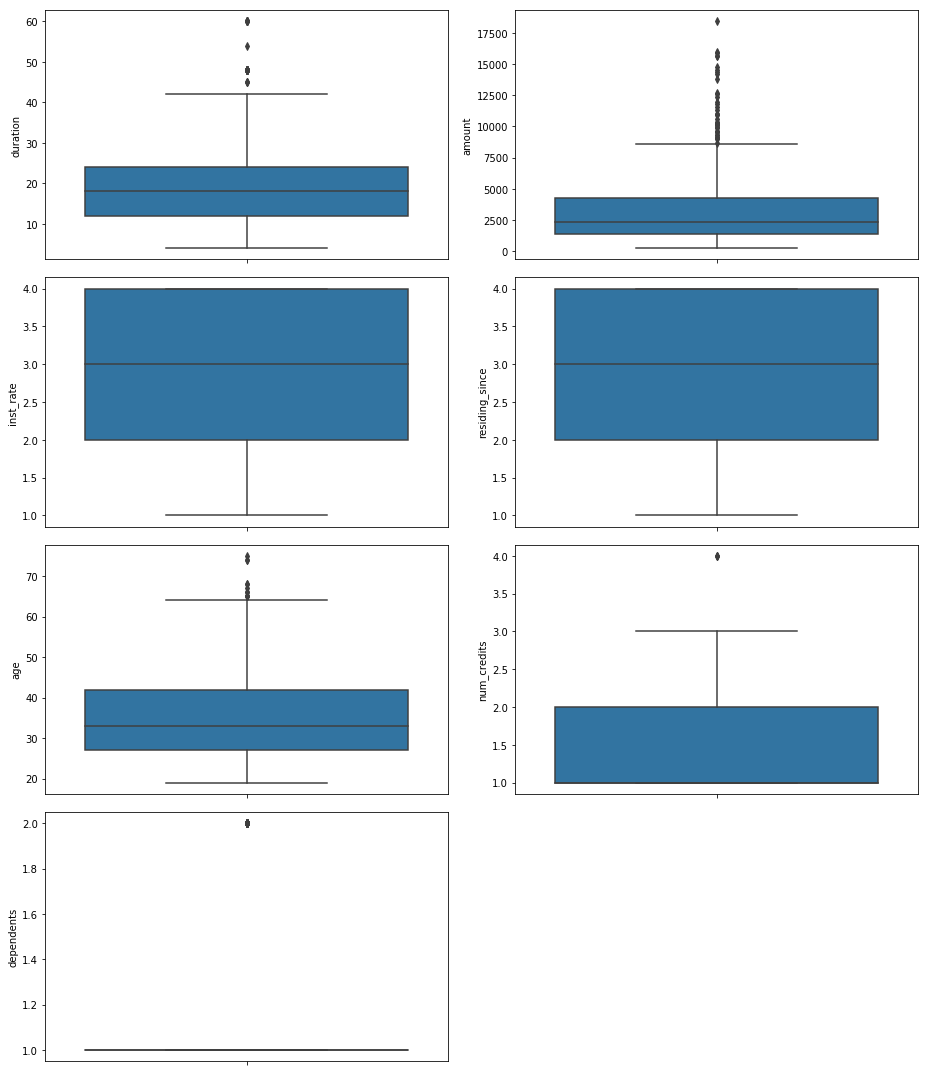

In [17]:
box_plot(X_train, num_cols)

- From the above plot we can check for extreme data points(outliers), like in case of duration, age and amount.

## 3) 5 - point summary + Standard deviation

### For numerical columns

In [86]:
X_train.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21.452000,3449.456000,3.002000,2.840000,35.478000,1.416000,1.128000
std,12.056634,3073.550205,1.108356,1.084783,11.299951,0.586201,0.334424
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2335.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4274.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


- The standard deviation for installment_rate, residing_since, num_credits and dependents are very low. So we will have to take a call on, how these features can be included and how they can improve our model.
- The percentile values for different features like duration, amount, age vary very differently, which is an indication that we need to perform scaling on these features.

### For categorical columns

In [90]:
X_train.describe(include='object')

,checkin_acc,credit_history,purpose,saving_acc,present_emp_since,personal_status,other_debtors,property,inst_plans,housing,job,telephone,foreign_worker
count,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,197,259,149,302,173,271,451,175,413,352,311,288,482


- From the above statistics we can make out, for most features on an average there are 4 unique classes.

## 4) Distributions

In [586]:
def distribution_plot_numerical(X, num_cols):

    plt.figure(figsize=(20,15))
    for i in range(0, len(num_cols)):

        plt.subplot(4,2,i+1)
        sns.distplot(X[num_cols[i]], kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

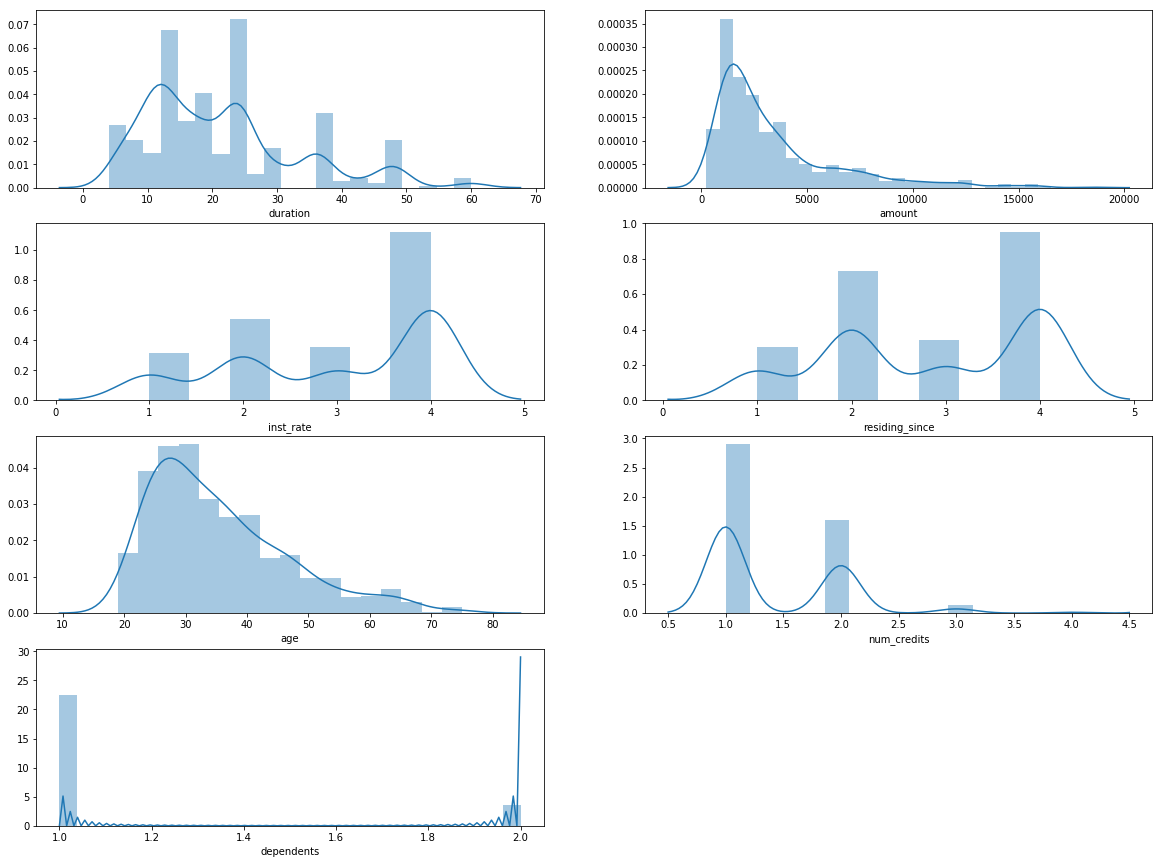

In [587]:
distribution_plot_numerical(X_train, num_cols)

- For various distributions, we can see a fair bit of skewness, which can be handled through performing transformations.

In [92]:
def distribution_plot_categorical(X, cat_cols):
    plt.figure(figsize=(20,15))
    for i in range(0, len(cat_cols)):

        plt.subplot(7,2,i+1)
        sns.countplot(df[cat_cols[i]])
        plt.tight_layout()

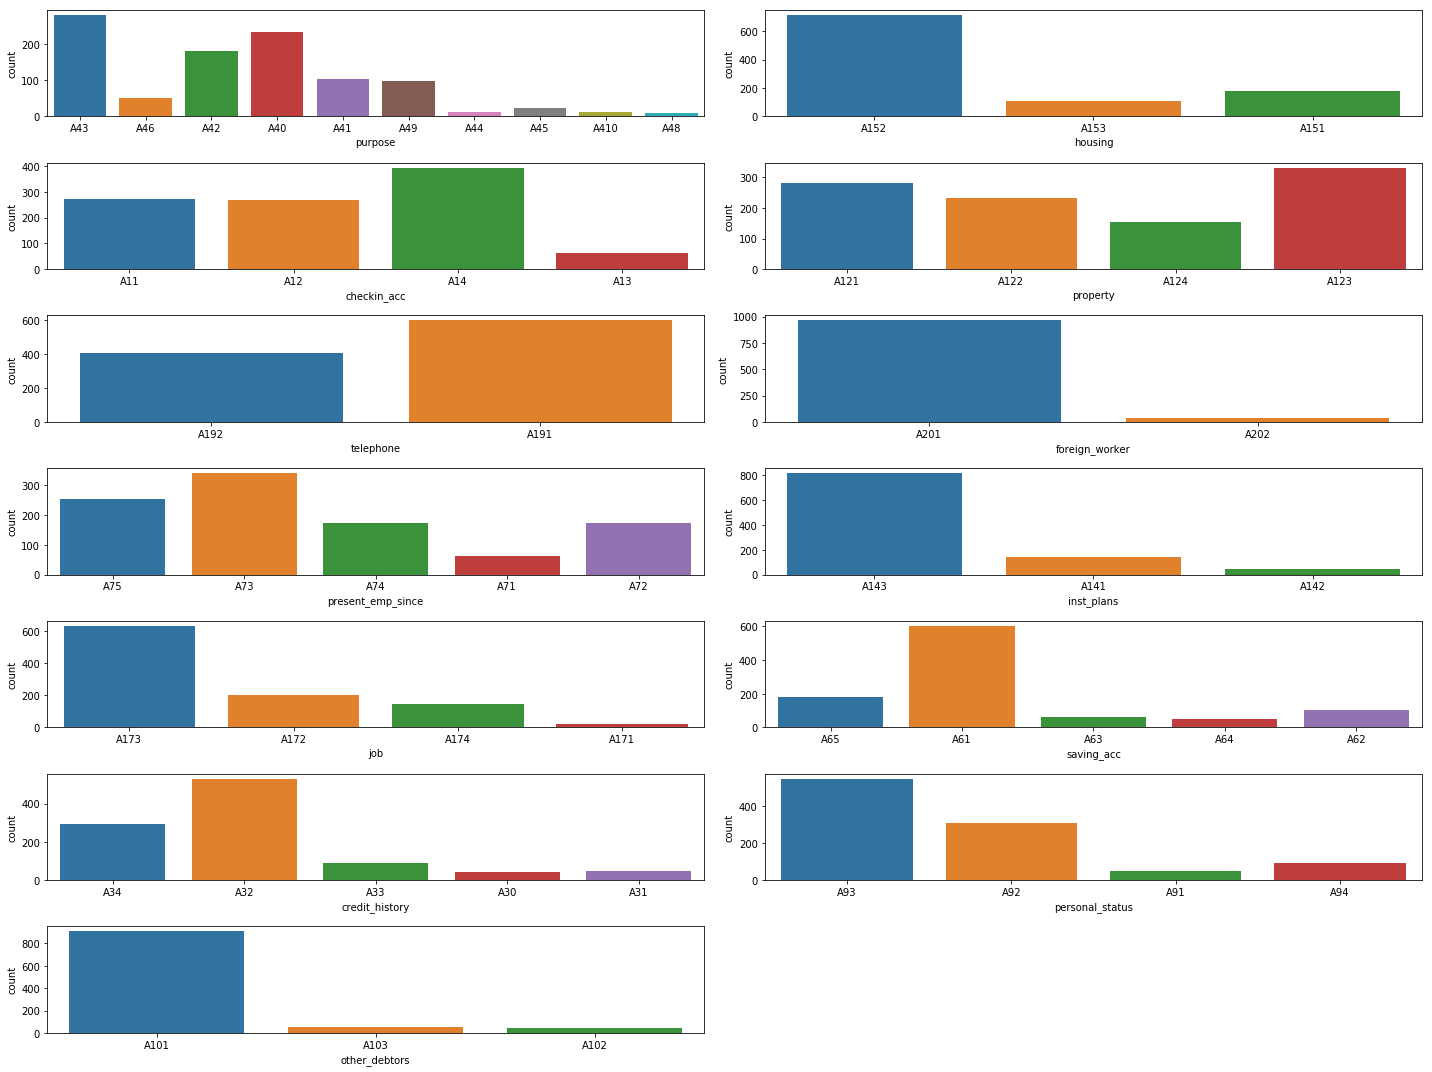

In [93]:
distribution_plot_categorical(X_train, cat_cols)

# EDA - Bivariate

## 1) Facet plots

## Correlating numerical features

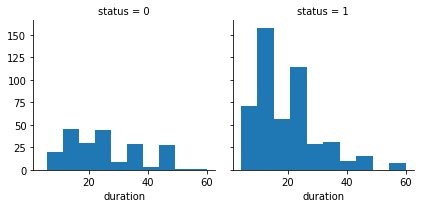

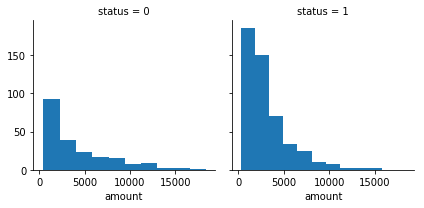

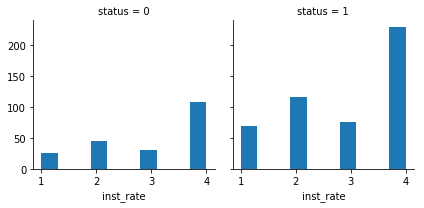

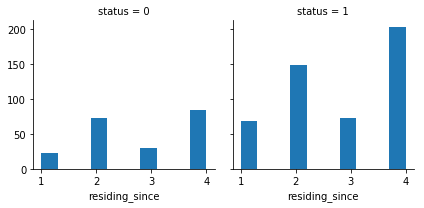

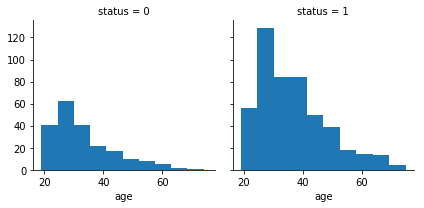

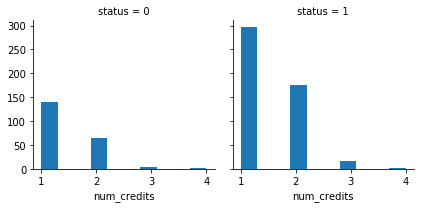

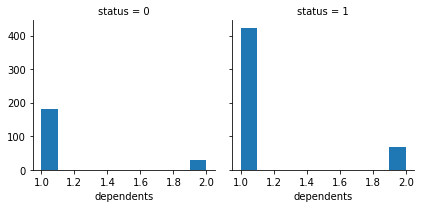

In [22]:
temp_df = pd.concat([X_train, y_train], axis=1)

for col in num_cols:
    
    g = sns.FacetGrid(temp_df,  col="status")
    g.map(plt.hist, col)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/seaborn/axisgrid.py:703:

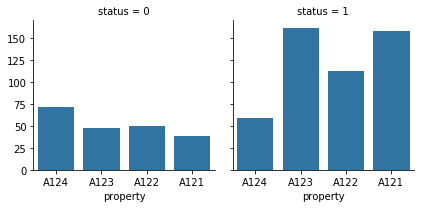

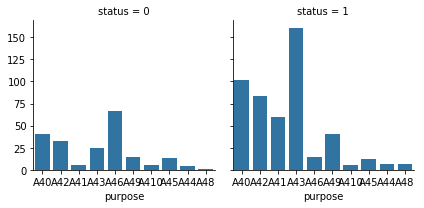

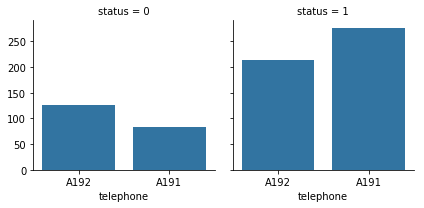

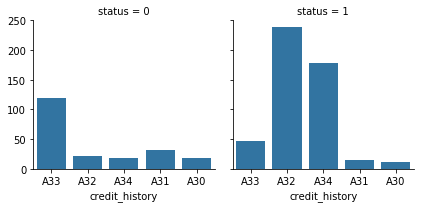

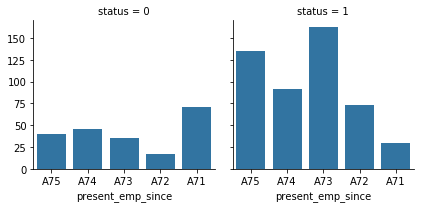

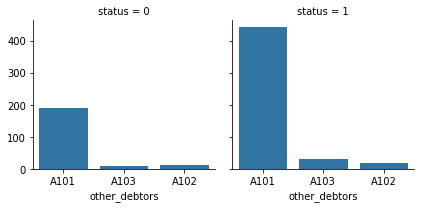

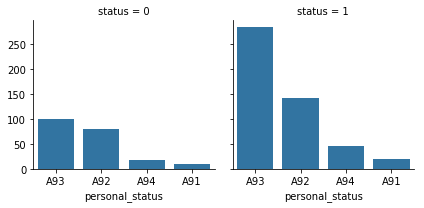

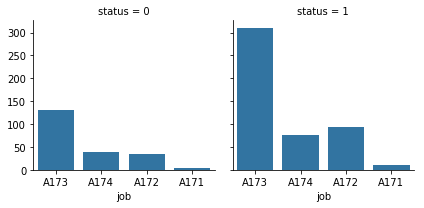

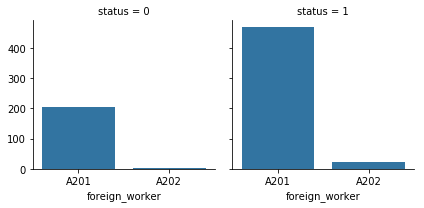

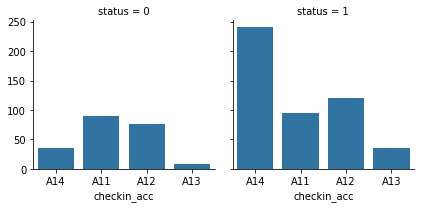

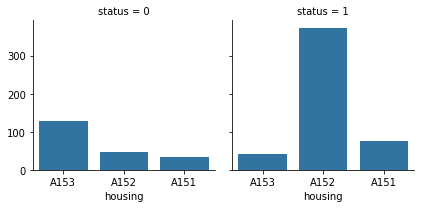

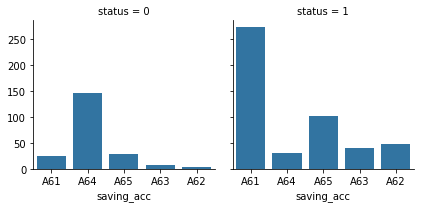

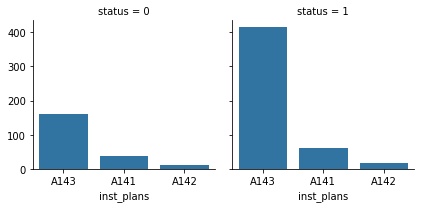

In [23]:
for col in cat_cols:
    
    g = sns.FacetGrid(temp_df,  col="status")
    g.map(sns.countplot, col)
    
plt.tight_layout()

## 2) Feature-wise model accuracy

In [18]:
def dummify(train, test, cat_cols):
    train_dummy = pd.get_dummies(train, drop_first=True, prefix=cat_cols)
    test_dummy = pd.get_dummies(test, drop_first=True, prefix=cat_cols)
    # Add missing columns
    missing_cols = set(train_dummy.columns).difference(test_dummy.columns)
    for col in missing_cols:
        test_dummy[col] = 0
    return train_dummy, test_dummy

In [107]:
def model(X_train, y_train, X_val, y_val, cols, cols_attr):
    
    scores = []
    lr = LogisticRegression()
    scaler = StandardScaler()
    for col in cols:
        if cols_attr == "categorical":
            X_train_new, X_val_new = dummify(X_train[col], X_val[col], col)
            lr.fit(X_train_new, y_train)
            y_predict = lr.predict(X_val_new)
            scores.append((col , 'Score : ' + str(accuracy_score(y_val, y_predict))))
        if cols_attr == "numerical":
            X_train[col] = scaler.fit_transform(X_train[[col]])
            X_val[col] = scaler.transform(X_val[[col]])
            lr.fit(X_train[[col]], y_train)
            y_predict = lr.predict(X_val[[col]])
            scores.append((col , 'Score : ' + str(accuracy_score(y_val, y_predict))))
            print(col + str(lr.coef_))
        
    return scores

### Scores for categorical feature

In [105]:
scores = model(X_train, y_train, X_val, y_val, cat_cols, 'categorical')
sorted(scores, key = lambda x: x[1])

[('housing', 'Score : 0.694'),
 ('checkin_acc', 'Score : 0.694'),
 ('property', 'Score : 0.694'),
 ('telephone', 'Score : 0.694'),
 ('foreign_worker', 'Score : 0.694'),
 ('present_emp_since', 'Score : 0.694'),
 ('inst_plans', 'Score : 0.694'),
 ('job', 'Score : 0.694'),
 ('saving_acc', 'Score : 0.694'),
 ('personal_status', 'Score : 0.694'),
 ('other_debtors', 'Score : 0.694'),
 ('credit_history', 'Score : 0.698'),
 ('purpose', 'Score : 0.702')]

### Scores for numerical feature

In [108]:
scores_num = model(X_train, y_train, X_val, y_val, num_cols, 'numerical')
sorted(scores_num, key = lambda x : x[1])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


duration[[-0.42164886]]
amount[[-0.3554977]]
inst_rate[[-0.17814512]]
residing_since[[0.03874457]]
age[[0.36691907]]
num_credits[[0.19582053]]
dependents[[-0.01152806]]


[('inst_rate', 'Score : 0.694'),
 ('residing_since', 'Score : 0.694'),
 ('age', 'Score : 0.694'),
 ('num_credits', 'Score : 0.694'),
 ('dependents', 'Score : 0.694'),
 ('duration', 'Score : 0.704'),
 ('amount', 'Score : 0.708')]

## Multivariate - Heatmap

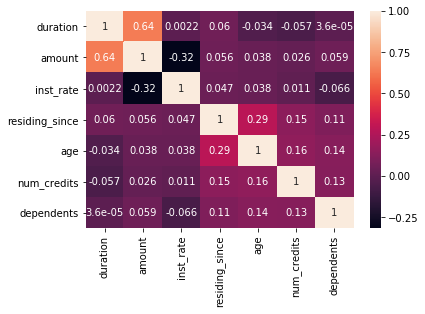

In [109]:
sns.heatmap(X_train[num_cols].corr(), annot=True)

- No significant correlation between numerical variables

## Feature Pre-processing

## Normalisation

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


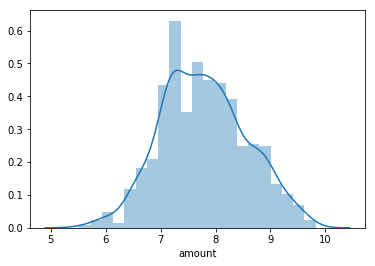

In [114]:
sns.distplot(np.log(df['amount']), kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


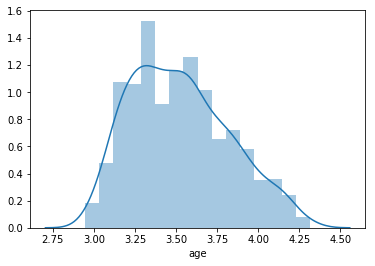

In [115]:
sns.distplot(np.log(df['age']), kde=True)

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


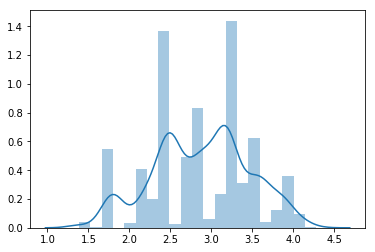

In [116]:
sns.distplot(np.log(df[['duration']]), kde=True)

- The above log transformation is the demonstration of reducing skewness from a feature, which indirectly handles outliers as shown below.

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


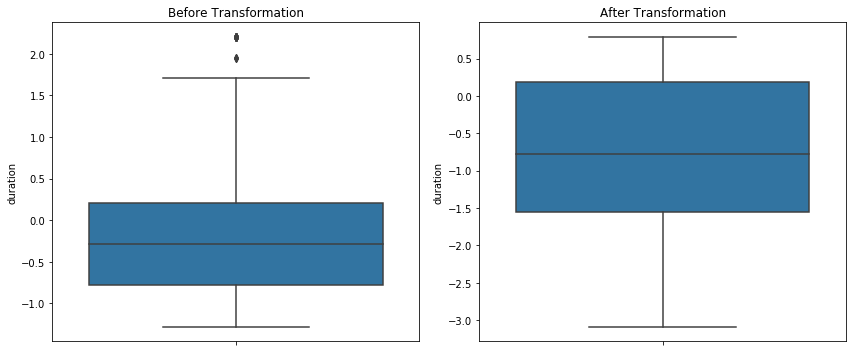

In [127]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=X_train['duration'])
plt.title('Before Transformation')
plt.subplot(1,2,2)
sns.boxplot(y=np.log(X_train['duration']))
plt.title('After Transformation')
plt.tight_layout()

## Build model without any type of transformation

In [146]:
def logistic_model(X, y):
    
    lr = LogisticRegression()
    lr.fit(X, y)
    return lr

In [147]:
train_dummy, val_dummy = dummify(X_train, X_val, cat_cols)

In [148]:
train_dummy.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,purpose_A12,purpose_A13,purpose_A14,...,inst_plans_A124,job_A142,job_A143,saving_acc_A152,saving_acc_A153,credit_history_A172,credit_history_A173,credit_history_A174,personal_status_A192,other_debtors_A202
680,6,1538,1,2,56,1,1,0,0,1,...,1,0,1,1,0,0,1,0,0,0
177,6,338,4,4,52,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
395,39,11760,2,3,32,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
911,24,4736,2,4,25,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
793,24,2892,3,4,51,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [149]:
train_dummy.shape, val_dummy.shape

((500, 48), (500, 48))

In [150]:
lr = logistic_model(train_dummy, y_train)

In [151]:
y_predict = lr.predict(val_dummy)
accuracy_score(y_val, y_predict)

0.788

## Build model after transformation

## Scaling & Normalize

In [220]:
def normalize_scale(X, cols):
    
    scaler = StandardScaler()
    for col in cols:
        
        X[col] = scaler.fit_transform(np.log(X[[col]]))
        
    return X

In [221]:
transformed_X_train = normalize_scale(X_train, ['duration', 'age', 'amount'])
transformed_X_val = normalise_scale(X_val, ['duration', 'age', 'amount'])

/home/ubuntu/miniconda/envs/home_credit/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [222]:
transformed_X_train.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
680,A14,-1.971182,A32,A46,-0.591977,A61,A72,1,A92,A101,2,A124,1.692717,A143,A152,1,A173,1,A191,A201
177,A11,-1.971182,A34,A43,-2.463466,A63,A75,4,A93,A101,4,A123,1.442936,A143,A152,2,A173,1,A191,A201
395,A12,1.326295,A33,A46,1.920590,A62,A74,2,A93,A101,3,A124,-0.193470,A143,A151,1,A173,1,A192,A201
911,A12,0.470996,A34,A42,0.797208,A61,A72,2,A92,A101,4,A123,-1.025512,A141,A152,1,A172,1,A191,A201
793,A13,0.470996,A32,A42,0.187977,A61,A75,3,A91,A101,4,A124,1.377487,A143,A153,1,A173,1,A191,A201


In [223]:
transformed_X_val.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
680,A14,-1.971182,A32,A46,-0.591977,A61,A72,1,A92,A101,2,A124,1.692717,A143,A152,1,A173,1,A191,A201
177,A11,-1.971182,A34,A43,-2.463466,A63,A75,4,A93,A101,4,A123,1.442936,A143,A152,2,A173,1,A191,A201
395,A12,1.326295,A33,A46,1.920590,A62,A74,2,A93,A101,3,A124,-0.193470,A143,A151,1,A173,1,A192,A201
911,A12,0.470996,A34,A42,0.797208,A61,A72,2,A92,A101,4,A123,-1.025512,A141,A152,1,A172,1,A191,A201
793,A13,0.470996,A32,A42,0.187977,A61,A75,3,A91,A101,4,A124,1.377487,A143,A153,1,A173,1,A191,A201


In [224]:
train_dummy, val_dummy = dummify(transformed_X_train, transformed_X_val, cat_cols)

In [229]:
val_dummy.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,purpose_A12,purpose_A13,purpose_A14,...,inst_plans_A124,job_A142,job_A143,saving_acc_A152,saving_acc_A153,credit_history_A172,credit_history_A173,credit_history_A174,personal_status_A192,other_debtors_A202
680,-1.971182,-0.591977,1,2,1.692717,1,1,0,0,1,...,1,0,1,1,0,0,1,0,0,0
177,-1.971182,-2.463466,4,4,1.442936,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
395,1.326295,1.920590,2,3,-0.193470,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
911,0.470996,0.797208,2,4,-1.025512,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
793,0.470996,0.187977,3,4,1.377487,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [230]:
train_dummy.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,purpose_A12,purpose_A13,purpose_A14,...,inst_plans_A124,job_A142,job_A143,saving_acc_A152,saving_acc_A153,credit_history_A172,credit_history_A173,credit_history_A174,personal_status_A192,other_debtors_A202
680,-1.971182,-0.591977,1,2,1.692717,1,1,0,0,1,...,1,0,1,1,0,0,1,0,0,0
177,-1.971182,-2.463466,4,4,1.442936,2,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
395,1.326295,1.920590,2,3,-0.193470,1,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
911,0.470996,0.797208,2,4,-1.025512,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
793,0.470996,0.187977,3,4,1.377487,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,0


In [231]:
lr = logistic_model(train_dummy, y_train)

In [233]:
y_predict = lr.predict(val_dummy)
accuracy_score(y_val, y_predict)

0.79

- After applying log transformation and Scaling the accuracy score has improved slightly

In [235]:
confusion_matrix(y_val, y_predict)

array([[ 82,  71],
       [ 34, 313]])